In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [2]:
# Load dataset
data = pd.read_csv("/content/drive/MyDrive/Bharat_Intern/Housing.csv")
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


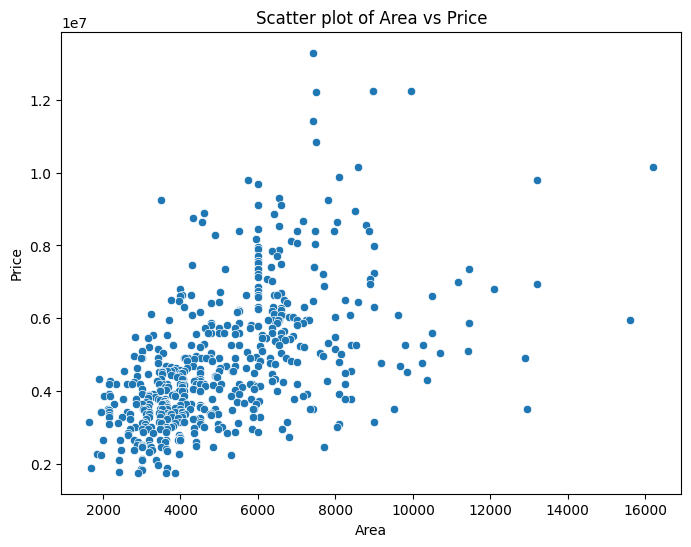

In [3]:
# Scatter plot between the 'area' and 'price' columns
plt.figure(figsize=(8, 6))
sns.scatterplot(x='area', y='price', data=data)
plt.title('Scatter plot of Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

<ipython-input-4-331dd13f2f56>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


<Axes: xlabel='price', ylabel='Density'>

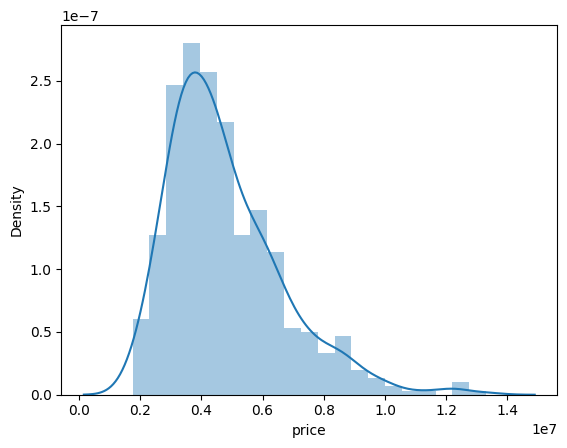

In [4]:
sns.distplot(data['price'])

<ipython-input-5-3739d7512ef7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')


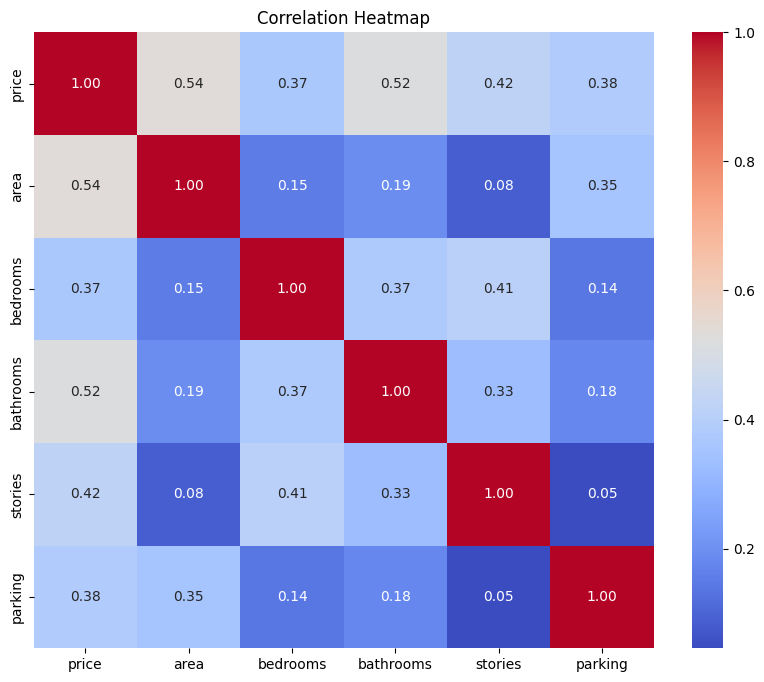

In [5]:
# Correlation heatmap to visualize relationships between numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [6]:
# Convert categorical columns to numerical using One-Hot Encoding
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
data_processed = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [7]:
# Split dataset into features and target variable
X = data_processed.drop('price', axis=1)
y = data_processed['price']

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

## **Random Forest**

In [10]:
# Initialize Random Forest model
rf_model = RandomForestRegressor(random_state=42)

In [11]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [12]:
# Initialize GridSearchCV for Random Forest model
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [13]:
# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best R-squared Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best R-squared Score: 0.617895872766909


## **Linear Regression**

In [14]:
degree = 2  # Degree of polynomial features
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

In [15]:
# Cross-validation to evaluate the model performance
scores = cross_val_score(polyreg, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validated R-squared score: {np.mean(scores)}")

Cross-validated R-squared score: -0.9049540453574743


In [16]:
# Fit the polynomial regression model on the entire training set
polyreg.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [17]:
# Predict on the test set
y_pred = polyreg.predict(X_test)

In [18]:
# Evaluate performance on the test set
test_r2 = r2_score(y_test, y_pred)
print(f"Test set R-squared score: {test_r2}")

Test set R-squared score: 0.6208412813348305
